# Project 1: Errors in Regression 
Math 4377, Fall 2022 <br /> 
Katie Rink : *10.25.2022*

## Overview

$E(y_{0} - \hat f(x_{0}))^2 = Var(\hat f(x_{0})) + [Bias(\hat f(x_{0}))]^2 + Var(ϵ)$

$Var(\hat f)$ is the Variance : *Amount by which $\hat f$ would change if we estimated it using a different training set*

$Bias(\hat f) = E(\hat f) - f$ is the Bias : *Error from approximating a complicated problem with a simpler model*

$Var(ϵ)$ is the irreducible error. 

In [1]:
#import statements
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
from csaps import csaps
from numpy import zeros
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import random
from sklearn.model_selection import train_test_split

## Data Generation

#### Models :
  1) Linear : $f(x) = ax+b$ 


  2) Quadratic : $f(x) = ax^2 + bx + c$


  3) Nonlinear : $f(x) = x sin x, f(x) = {1 \over 1 + 25x^2}, etc.$

#### Loading Dataset
Pick a domain and decide how many data points to produce
Split the data into testing and training randomly

For the random noise, control mean and variance

In [2]:
#Generate Linear Model Points
def linear_data(n=30, range=5., seed=1234):
    #Introducing noise using a random seed
    np.random.seed(seed)
    x = np.linspace(-range, range, n)
    
    #Define the underlying function of the data
    f = lambda x : x
    
    #adding noise
    mean = .2
    var = .8
    y = f(x) + (np.random.rand(n) - mean) * var 
    
    return x, y

In [3]:
#Generate Quadratic Model Points
def quad_data(n=25, range=5., seed=1234):
    #Introducing noise using a random seed
    np.random.seed(seed)
    x = np.linspace(-range, range, n)
    
    #Define the underlying function of the data
    f = lambda x : x**2
    
    #adding noise
    mean = .2
    var = .8
    y = f(x) + (np.random.rand(n) - mean) * var 
    
    return x, y

In [4]:
#Generate Nonlinear Model Points
def nonlin_data(n=25, range=5., seed=1234):
    #Introducing noise using a random seed
    np.random.seed(seed)
    x = np.linspace(-range, range, n)
    
    #Define the underlying function of the data
    f = lambda x : x*np.exp(-(x/2.5)**2) 
    
    #adding noise
    mean = .2
    var = .8
    y = f(x) + (np.random.rand(n) - mean) * var 
    
    return x, y

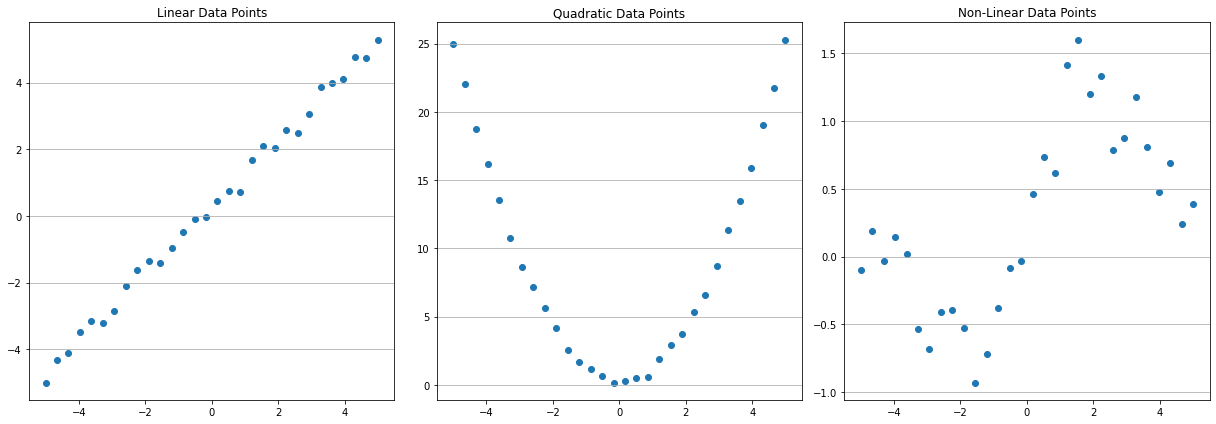

In [5]:
#Setting Domain Range
n = 5
#Setting Number of Data Points
num_points = 30

#Create Linear Model Data : x data, y data
x_lin, y_lin = linear_data(num_points, n)

#Create Quadratic Model Data : x data, y data
x_quad, y_quad = quad_data(num_points, n)

#Create Nonlinear Model Data : x data, y data
x_nonlin, y_nonlin = nonlin_data(num_points, n)

#Graph above datapoints
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 6))

#Graph Linear Data Points
ax1.scatter(x_lin, y_lin)
ax1.grid(axis='y')
ax1.set_title('Linear Data Points')

#Graph Quadratic Data Points
ax2.scatter(x_quad, y_quad)
ax2.grid(axis='y')
ax2.set_title('Quadratic Data Points')

#Graph Quadratic Data Points
ax3.scatter(x_nonlin, y_nonlin)
ax3.grid(axis='y')
ax3.set_title('Non-Linear Data Points')

plt.tight_layout()

## Regression Methods

In [6]:
def calc_df(x, s) :
    Y = np.identity(len(x))
    R = zeros([len(x),len(x)])
    for i in range(len(x)):
        yb=Y[:,i];
        R[:,i]=csaps(x,yb,x,smooth=s)
    return R.trace()

#### Test 1
$Y = β_{0} + β_{1}X$ (df=2)

In [7]:
#Graph
def lin_reg(x, y, color, df, noise, ax) :
    xs = np.linspace(x[0], x[-1], 150)
    ys = csaps(x, y + (noise * np.random.random(len(x)) - 1), xs, smooth=0)

    ax.plot(xs, ys, color=color)
    ax.plot(xs, ys, color=color)
    if(df) : 
        print("Degrees of Freedom : " + str(calc_df(xs, 0)))
    return ys, calc_df(xs, 0)

Degrees of Freedom : 1.9999999999621716


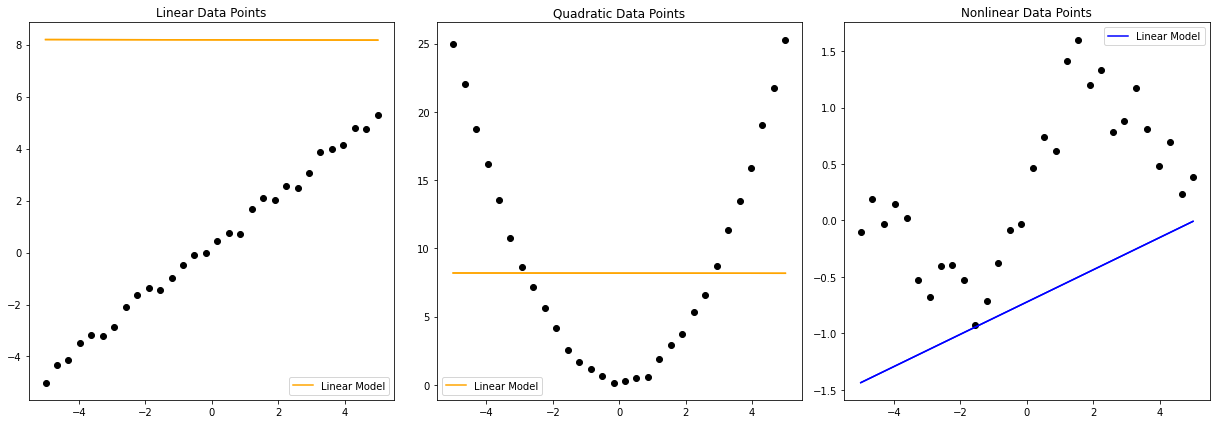

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 6))

lin_reg(x_quad, y_quad, "orange", True, 0, ax1)
ax1.scatter(x_lin, y_lin, color='black')
ax1.set_title("Linear Data Points")
ax1.legend(['Linear Model'])

lin_reg(x_quad, y_quad, "orange", False, 0, ax2)
ax2.scatter(x_quad, y_quad, color='black')
ax2.set_title('Quadratic Data Points')
ax2.legend(['Linear Model'])

lin_reg(x_nonlin, y_nonlin, "blue", False, 0, ax3)
ax3.scatter(x_nonlin, y_nonlin, color='black')
ax3.set_title('Nonlinear Data Points')
ax3.legend(['Linear Model'])

plt.tight_layout()
plt.show()

#### Test 2
Smoothing Cubic spline with 5 Degrees of Freedom

In [9]:
#Graph
def smoothing_cubic_5(x, y, color, df, noise, ax) :
    xs = np.linspace(x[0], x[-1], 150)
    ys = csaps(x, y + (noise * np.random.random(len(x)) - 1), xs, smooth=.1)

    ax.plot(xs, ys, color=color)
    ax.plot(xs, ys, color=color)
    if(df) : 
        print("Degrees of Freedom : " + str(calc_df(xs, .1)))
    return ys, calc_df(xs, .1)

Degrees of Freedom : 5.03686486588361


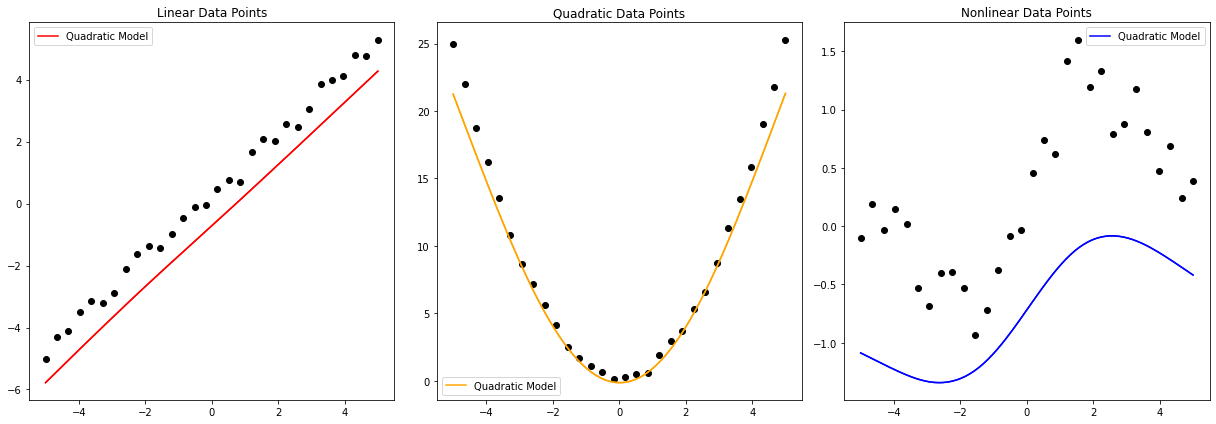

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 6))

smoothing_cubic_5(x_lin, y_lin, "red", True, 0, ax1)
ax1.scatter(x_lin, y_lin, color='black')
ax1.set_title("Linear Data Points")
ax1.legend(['Quadratic Model'])

smoothing_cubic_5(x_quad, y_quad, "orange", False, 0, ax2)
ax2.scatter(x_quad, y_quad, color='black')
ax2.set_title('Quadratic Data Points')
ax2.legend(['Quadratic Model'])

smoothing_cubic_5(x_nonlin, y_nonlin, "blue", False, 0, ax3)
ax3.scatter(x_nonlin, y_nonlin, color='black')
ax3.set_title('Nonlinear Data Points')
ax3.legend(['Quadratic Model'])

plt.tight_layout()
plt.show()

#### Test 3
Smoothing Cubic spliine with effective degree of freedom approximately 25

In [11]:
#Graph
def smoothing_cubic_25(x, y, color, df, noise, ax) :
    xs = np.linspace(x[0], x[-1], 150)
    ys = csaps(x, y + (noise * np.random.random(len(x)) - 1), xs, smooth=1.5)

    ax.plot(xs, ys, color=color)
    if(df) : 
        print("Degrees of Freedom : " + str(calc_df(xs, .9)))
    return ys, calc_df(x, .9)

Degrees of Freedom : 13.107613317199235


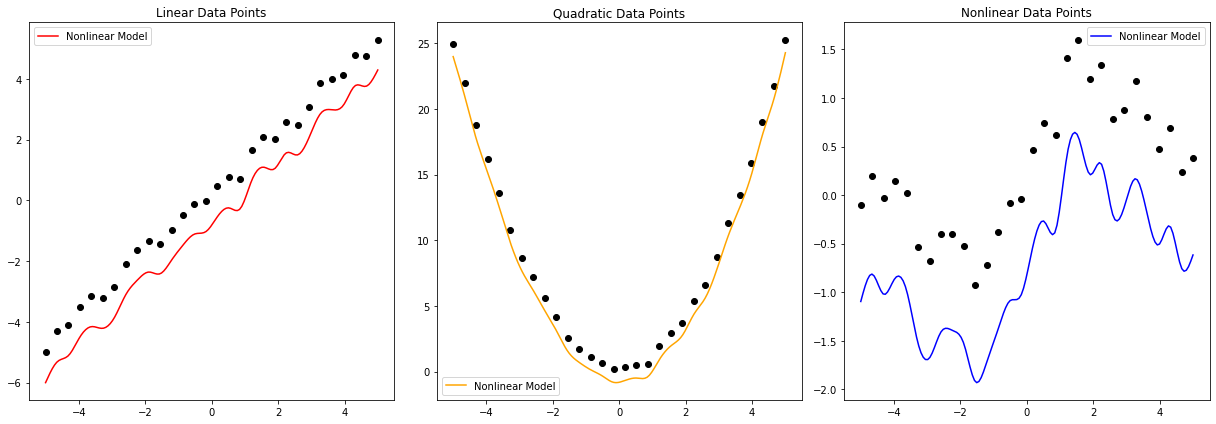

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 6))

smoothing_cubic_25(x_lin, y_lin, "red", True, 0, ax1)
ax1.scatter(x_lin, y_lin, color='black')
ax1.set_title("Linear Data Points")
ax1.legend(['Nonlinear Model'])

smoothing_cubic_25(x_quad, y_quad, "orange", False, 0, ax2)
ax2.scatter(x_quad, y_quad, color='black')
ax2.set_title('Quadratic Data Points')
ax2.legend(['Nonlinear Model'])

smoothing_cubic_25(x_nonlin, y_nonlin, "blue", False, 0, ax3)
ax3.scatter(x_nonlin, y_nonlin, color='black')
ax3.set_title('Nonlinear Data Points')
ax3.legend(['Nonlinear Model'])

plt.tight_layout()
plt.show()

## Research Objective

In [13]:
def _draw_bootstrap_sample(rng, X, y):
    size_rdct = 10
    sample_indices = np.arange(len(y))
    bootstrap_indices = rng.choice(sample_indices, size=len(y)-size_rdct, replace=False)
    return X[bootstrap_indices], y[bootstrap_indices]

#### Linearity 
The performance of methods with different flexibility on data from linear to nonlinear
underlying functions. (e.g. something like Figures 2.9-2.11 on the textbook).

In [14]:
#Calculate average Mean Squared Erorr, Bias, Variance, 
def calc_MSE(num_rounds, X_train, y_train, X_test, y_test, p) :
    all_pred = np.zeros((num_rounds, len(y_test)), dtype=np.float64)

    for i in range(num_rounds):
        X_boot, y_boot = _draw_bootstrap_sample(np.random.RandomState(120) , X_train, y_train)
        X_boot, y_boot = (list(t) for t in zip(*sorted(zip(X_boot, y_boot))))
        pred = csaps(X_boot, y_boot, X_test,smooth=p)
        all_pred[i] = pred
        # compute the test MSE
        avg_expected_loss = np.apply_along_axis(lambda x: ((x - y_test) ** 2).mean(), axis=1, arr=all_pred).mean()

        # mean prediction at x from all learned model 
        mean_predictions = np.mean(all_pred, axis=0) #the avarage at x from all models

    return avg_expected_loss

Text(0, 0.5, 'Mean Squared Error')

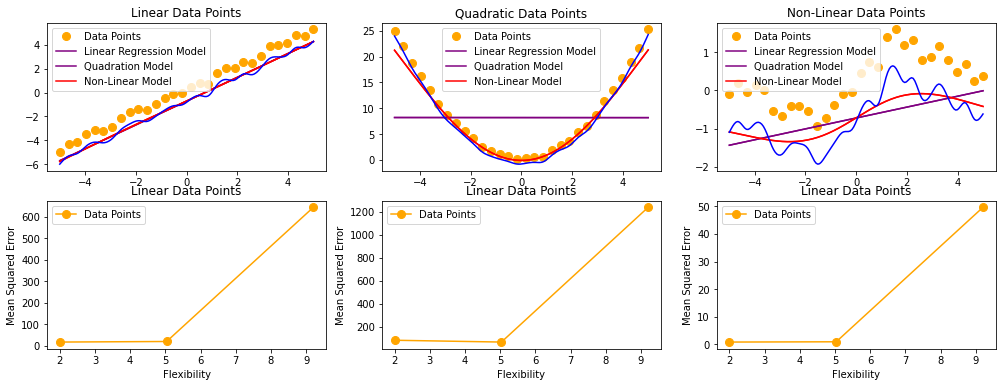

In [15]:
#Each Graph shows a basis of different points and how each 
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(x_lin, y_lin, test_size=0.5, random_state=0)
X_train_quad, X_test_quad, y_train_quad, y_test_quad = train_test_split(x_quad, y_quad, test_size=0.5, random_state=0)
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = train_test_split(x_nonlin, y_nonlin, test_size=0.5, random_state=0)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(17, 6))

ax1.plot(x_lin, y_lin, 'orange', marker="o", markersize=8, linestyle = 'None')

y_lin1, y_df1 = lin_reg(x_lin, y_lin, 'Purple', False, 0, ax1)
y_lin2, y_df2 = smoothing_cubic_5(x_lin, y_lin, 'Red', 0, False, ax1)
y_lin3, y_df3 = smoothing_cubic_25(x_lin, y_lin, 'Blue', 0, False, ax1)
ax1.set_title("Linear Data Points")
ax1.legend(['Data Points', 'Linear Regression Model','Quadration Model','Non-Linear Model'])

ax2.plot(x_quad, y_quad, 'orange', marker="o", markersize=8, linestyle = 'None')
y_quad1, y_df1 = lin_reg(x_quad, y_quad, 'Purple', False, 0, ax2)
y_quad2, y_df2 = smoothing_cubic_5(x_quad, y_quad, 'Red', False, 0, ax2)
y_quad3, y_df3 = smoothing_cubic_25(x_quad, y_quad, 'Blue', False, 0, ax2)
ax2.set_title("Quadratic Data Points")
ax2.legend(['Data Points', 'Linear Regression Model','Quadration Model','Non-Linear Model'])

ax3.plot(x_nonlin, y_nonlin, 'orange', marker="o", markersize=8, linestyle = 'None')
y_nonlin1, y_df1 = lin_reg(x_nonlin, y_nonlin, 'Purple', False, 0, ax3)
y_nonlin2, y_df2 = smoothing_cubic_5(x_nonlin, y_nonlin, 'Red', False, 0, ax3)
y_nonlin3, y_df3 = smoothing_cubic_25(x_nonlin, y_nonlin, 'Blue', False, 0, ax3)
ax3.set_title("Non-Linear Data Points")
ax3.legend(['Data Points', 'Linear Regression Model','Quadration Model','Non-Linear Model'])

#Each Graph shows mean squared vs flexibility for each set of points
flexibility = [y_df1, y_df2, y_df3]

mse_1 = [calc_MSE(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin, 0),calc_MSE(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin, .1),calc_MSE(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin, .9)]
ax4.plot(flexibility, mse_1, 'orange', marker='o',markersize=8)
ax4.set_title("Linear Data Points")
ax4.legend(['Data Points', 'Linear Regression Model','Quadration Model','Non-Linear Model'])
ax4.set_xlabel('Flexibility')
ax4.set_ylabel('Mean Squared Error')

mse_2 = [calc_MSE(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, 0),calc_MSE(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, .1),calc_MSE(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, .9)]
ax5.plot(flexibility, mse_2, 'orange', marker='o',markersize=8)
ax5.set_title("Linear Data Points")
ax5.legend(['Data Points', 'Linear Regression Model','Quadration Model','Non-Linear Model'])
ax5.set_xlabel('Flexibility')
ax5.set_ylabel('Mean Squared Error')

mse_3 = [calc_MSE(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, 0),calc_MSE(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, .1),calc_MSE(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, .9)]
ax6.plot(flexibility, mse_3, 'orange', marker='o',markersize=8)
ax6.set_title("Linear Data Points")
ax6.legend(['Data Points', 'Linear Regression Model','Quadration Model','Non-Linear Model'])
ax6.set_xlabel('Flexibility')
ax6.set_ylabel('Mean Squared Error')

#### MSE, Bias, Variance 
How does the MSE, Bias, and Var vary with method of different flexibility (e.g. something like Figure 2.12).\
MSE($x$) = $\frac{1}{m}\sum\limits_{i=1}^m(y-\hat{y}_i)$ \
Bias$^2$($\hat{f}(x))= (\bar{\hat{y}}-y)^2$ \
Var$(\hat{f}(x)) = \frac{1}{m}\sum\limits_{i=1}^m(\bar{\hat{y}}-\hat{y}_i)$ \

In [16]:
#Calculate average Mean Squared Erorr, Bias, Variance, 
def calc_avgs(num_rounds, X_train, y_train, X_test, y_test, p) :
    all_pred = np.zeros((num_rounds, len(y_test)), dtype=np.float64)

    for i in range(num_rounds):
        X_boot, y_boot = _draw_bootstrap_sample(np.random.RandomState(120) , X_train, y_train)
        X_boot, y_boot = (list(t) for t in zip(*sorted(zip(X_boot, y_boot))))
        pred = csaps(X_boot, y_boot, X_test,smooth=p)
        all_pred[i] = pred
        # compute the test MSE
        avg_expected_loss = np.apply_along_axis(
        lambda x: ((x - y_test) ** 2).mean(), axis=1, arr=all_pred).mean()

        # mean prediction at x from all learned model 
        mean_predictions = np.mean(all_pred, axis=0) #the avarage at x from all models

        avg_bias = np.sum((mean_predictions - y_test) ** 2) / y_test.size
        avg_var = np.sum((mean_predictions - all_pred) ** 2) / all_pred.size

    return avg_expected_loss, avg_bias, avg_var

Text(0.5, 0, 'Flexibility')

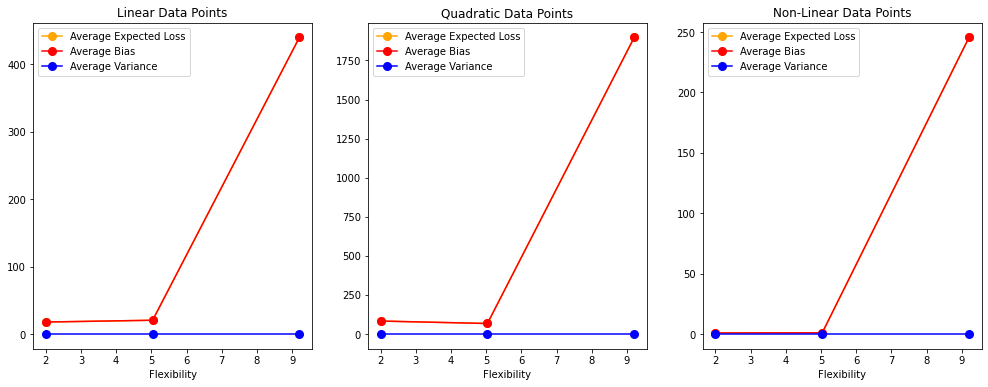

In [17]:
from sklearn.model_selection import train_test_split

#Each graph represents a different model, each line represents 
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(17, 6))
flexibility = [y_df1, y_df2, y_df3]

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(x_lin, y_lin, test_size=0.5, random_state=0)
X_train_quad, X_test_quad, y_train_quad, y_test_quad = train_test_split(x_quad, y_quad, test_size=0.5, random_state=0)
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = train_test_split(x_nonlin, y_nonlin, test_size=0.5, random_state=0)

avg_expected_loss_lin, avg_bias_lin, avg_var_lin = calc_avgs(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin, 0)
avg_expected_loss_quad, avg_bias_quad, avg_var_quad = calc_avgs(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin, .1)
avg_expected_loss_nonlin, avg_bias_nonlin, avg_var_nonlin = calc_avgs(20, X_train_lin, y_test_lin, X_test_lin, y_test_lin,.993)
ax1.plot(flexibility, [avg_expected_loss_lin, avg_expected_loss_quad, avg_expected_loss_nonlin], 'orange', marker="o", markersize=8)
ax1.plot(flexibility, [avg_bias_lin, avg_bias_quad, avg_bias_nonlin], 'red', marker="o", markersize=8)
ax1.plot(flexibility, [avg_var_lin, avg_var_quad, avg_var_nonlin], 'blue', marker="o", markersize=8)
ax1.set_title("Linear Data Points")
ax1.legend(['Average Expected Loss','Average Bias','Average Variance'])
ax1.set_xlabel('Flexibility')

avg_expected_loss_lin, avg_bias_lin, avg_var_lin = calc_avgs(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, 0)
avg_expected_loss_quad, avg_bias_quad, avg_var_quad = calc_avgs(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, .1)
avg_expected_loss_nonlin, avg_bias_nonlin, avg_var_nonlin = calc_avgs(20, X_train_quad, y_test_quad, X_test_quad, y_test_quad, .993)
ax2.plot(flexibility, [avg_expected_loss_lin, avg_expected_loss_quad, avg_expected_loss_nonlin], 'orange', marker="o", markersize=8)
ax2.plot(flexibility, [avg_bias_lin, avg_bias_quad, avg_bias_nonlin], 'red', marker="o", markersize=8)
ax2.plot(flexibility, [avg_var_lin, avg_var_quad, avg_var_nonlin], 'blue', marker="o", markersize=8)
ax2.set_title("Quadratic Data Points")
ax2.legend(['Average Expected Loss','Average Bias','Average Variance'])
ax2.set_xlabel('Flexibility')

avg_expected_loss_lin, avg_bias_lin, avg_var_lin = calc_avgs(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, 0)
avg_expected_loss_quad, avg_bias_quad, avg_var_quad = calc_avgs(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, .1)
avg_expected_loss_nonlin, avg_bias_nonlin, avg_var_nonlin = calc_avgs(20, X_train_nonlin, y_test_nonlin, X_test_nonlin, y_test_nonlin, .993)
ax3.plot(flexibility, [avg_expected_loss_lin, avg_expected_loss_quad, avg_expected_loss_nonlin], 'orange', marker="o", markersize=8)
ax3.plot(flexibility, [avg_bias_lin, avg_bias_quad, avg_bias_nonlin], 'red', marker="o", markersize=8)
ax3.plot(flexibility, [avg_var_lin, avg_var_quad, avg_var_nonlin], 'blue', marker="o", markersize=8)
ax3.set_title("Non-Linear Data Points")
ax3.legend(['Average Expected Loss','Average Bias','Average Variance'])
ax3.set_xlabel('Flexibility')

#### Noise
 How does the variance of noise affect the performance of different method (e.g. similar
to (1) but with a different noise level characterized by the variance.)

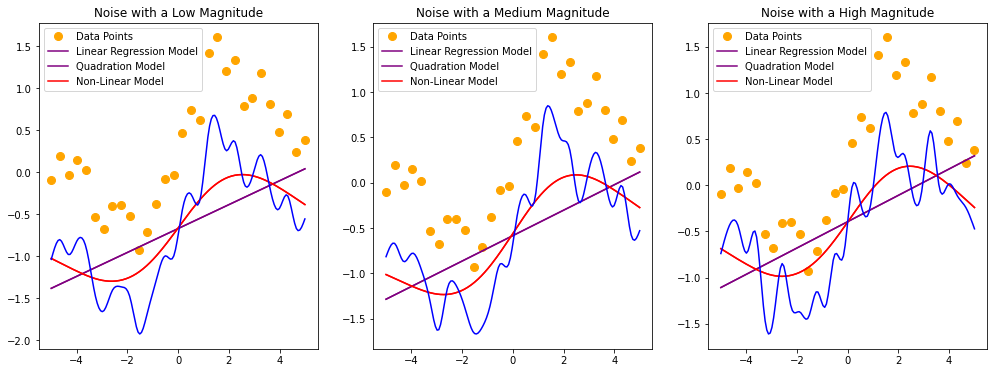

In [18]:
#Each Graph shows a basis of different points and how each 
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(x_lin, y_lin, test_size=0.5, random_state=0)
X_train_quad, X_test_quad, y_train_quad, y_test_quad = train_test_split(x_quad, y_quad, test_size=0.5, random_state=0)
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = train_test_split(x_nonlin, y_nonlin, test_size=0.5, random_state=0)

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(17, 6))

ax1.plot(x_nonlin, y_nonlin, 'orange', marker="o", markersize=8, linestyle = 'None')
y_nonlin1, y_df1 = lin_reg(x_nonlin, y_nonlin, 'Purple', False, .1, ax1)
y_nonlin2, y_df2 = smoothing_cubic_5(x_nonlin, y_nonlin, 'Red', False, .1, ax1)
y_nonlin3, y_df3 = smoothing_cubic_25(x_nonlin, y_nonlin, 'Blue', False, .1, ax1)
ax1.set_title("Noise with a Low Magnitude")
ax1.legend(['Data Points', 'Linear Regression Model','Quadration Model','Non-Linear Model'])

ax2.plot(x_nonlin, y_nonlin, 'orange', marker="o", markersize=8, linestyle = 'None')
y_nonlin1, y_df1 = lin_reg(x_nonlin, y_nonlin, 'Purple', False, .3, ax2)
y_nonlin2, y_df2 = smoothing_cubic_5(x_nonlin, y_nonlin, 'Red', False, .3, ax2)
y_nonlin3, y_df3 = smoothing_cubic_25(x_nonlin, y_nonlin, 'Blue', False, .3, ax2)
ax2.set_title("Noise with a Medium Magnitude")
ax2.legend(['Data Points', 'Linear Regression Model','Quadration Model','Non-Linear Model'])

ax3.plot(x_nonlin, y_nonlin, 'orange', marker="o", markersize=8, linestyle = 'None')
y_nonlin1, y_df1 = lin_reg(x_nonlin, y_nonlin, 'Purple', False, .6, ax3)
y_nonlin2, y_df2 = smoothing_cubic_5(x_nonlin, y_nonlin, 'Red', False, .6, ax3)
y_nonlin3, y_df3 = smoothing_cubic_25(x_nonlin, y_nonlin, 'Blue', False, .6, ax3)
ax3.set_title("Noise with a High Magnitude")
ax3.legend(['Data Points', 'Linear Regression Model','Quadration Model','Non-Linear Model'])

## Conclusion

What I learned from all this jazz